1. Build a machine learning model to predict salary based on position for
a given dataset


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.shape

(10, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Data cleaning

In [7]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
#split into independant and dependant variable
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:].values

## Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y)

## Build Decisison tree regression model

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [12]:
decisionmodel=DecisionTreeRegressor(max_depth=2)

In [13]:
decisionmodel.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [14]:
y_pred=decisionmodel.predict(x)

In [15]:
y_pred

array([-5.88005387e-01, -5.88005387e-01, -5.88005387e-01, -5.88005387e-01,
       -5.88005387e-01, -5.88005387e-01,  1.76049517e-03,  1.76049517e-03,
        8.82008081e-01,  2.64250325e+00])

[Text(0.5, 0.8333333333333334, 'X[0] <= 1.044\nsquared_error = 1.0\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.5, 'X[0] <= 0.348\nsquared_error = 0.086\nsamples = 8\nvalue = -0.441'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.017\nsamples = 6\nvalue = -0.588'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.031\nsamples = 2\nvalue = 0.002'),
 Text(0.75, 0.5, 'X[0] <= 1.393\nsquared_error = 0.775\nsamples = 2\nvalue = 1.762'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.882'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 2.643')]

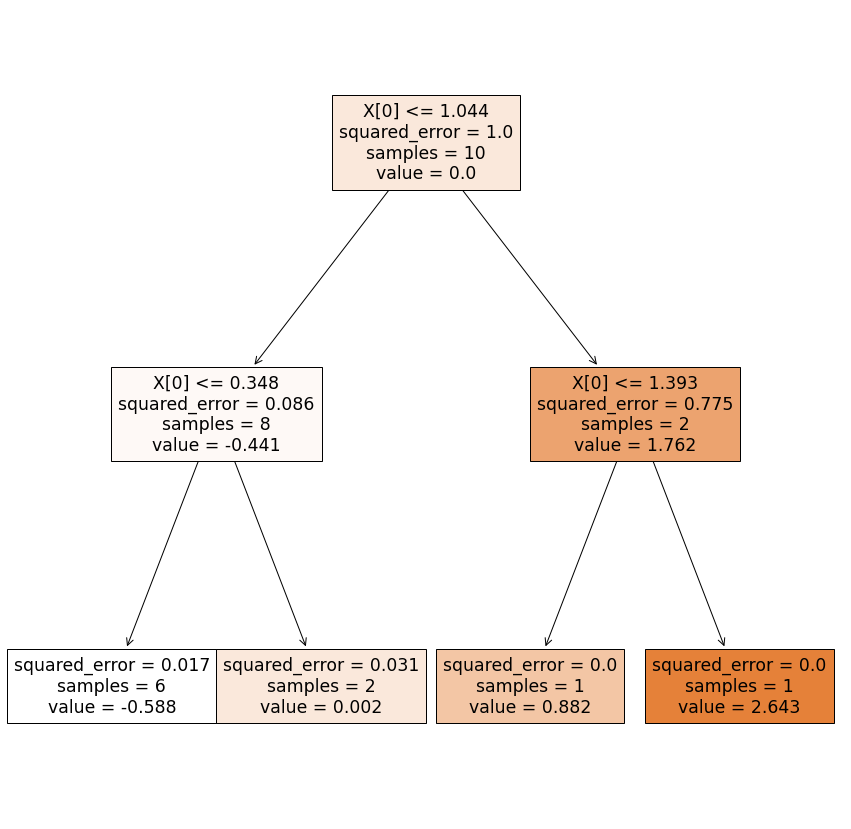

In [16]:
plt.figure(figsize=(15,15))
tree.plot_tree(decisionmodel,filled=True)

## Performance matrix

In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [18]:
R2_score=r2_score(y,y_pred)
R2_score

0.9835269906306854

In [19]:
Mean_Squared_Error=mean_squared_error(y,y_pred)
Mean_Squared_Error

0.016473009369314638

In [20]:
MeanAbsoluteError=mean_absolute_error(y,y_pred)
MeanAbsoluteError

0.10210871995178838